In [16]:
import pandas as pd
from prophet import Prophet


# 读取数据
path = "data.csv"
data = pd.read_csv(path, parse_dates=["date"])
data.head()

,date,lt,ht,weather,wind
0,2020-01-01,6,-3,阴转多云,南风 1级
1,2020-01-02,7,0,多云,南风 1级
2,2020-01-03,9,-1,霾转晴,东风 1级
3,2020-01-04,11,-1,霾转雨,东风 2级
4,2020-01-05,4,0,阴,东北风 3级


In [17]:
# 计算平均温度
data["tavg"] = data[["lt", "ht"]].mean(axis=1)
data.head()

,date,lt,ht,weather,wind,tavg
0,2020-01-01,6,-3,阴转多云,南风 1级,1.5
1,2020-01-02,7,0,多云,南风 1级,3.5
2,2020-01-03,9,-1,霾转晴,东风 1级,4.0
3,2020-01-04,11,-1,霾转雨,东风 2级,5.0
4,2020-01-05,4,0,阴,东北风 3级,2.0


In [18]:
# 重命名列使其符合 Prophet 的要求
avg_df = data.rename(columns={"date": "ds", "tavg": "y"})
avg_df.head()

,ds,lt,ht,weather,wind,y
0,2020-01-01,6,-3,阴转多云,南风 1级,1.5
1,2020-01-02,7,0,多云,南风 1级,3.5
2,2020-01-03,9,-1,霾转晴,东风 1级,4.0
3,2020-01-04,11,-1,霾转雨,东风 2级,5.0
4,2020-01-05,4,0,阴,东北风 3级,2.0


In [19]:
# 训练模型
m = Prophet()
m.fit(avg_df)
future = m.make_future_dataframe(periods=7)

12:01:42 - cmdstanpy - INFO - Chain [1] start processing
12:01:42 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future.tail()

,ds
572,2024-09-13
573,2024-09-14
574,2024-09-15
575,2024-09-16
576,2024-09-17


In [21]:
# 预测
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
572,2024-09-13,27.075705,22.621964,31.224635
573,2024-09-14,27.145139,22.978848,31.518322
574,2024-09-15,27.125488,22.428848,31.249474
575,2024-09-16,26.283367,22.168709,30.483232
576,2024-09-17,25.929190,21.576667,29.991690


D:\Miniconda3\envs\prophetenv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Miniconda3\envs\prophetenv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


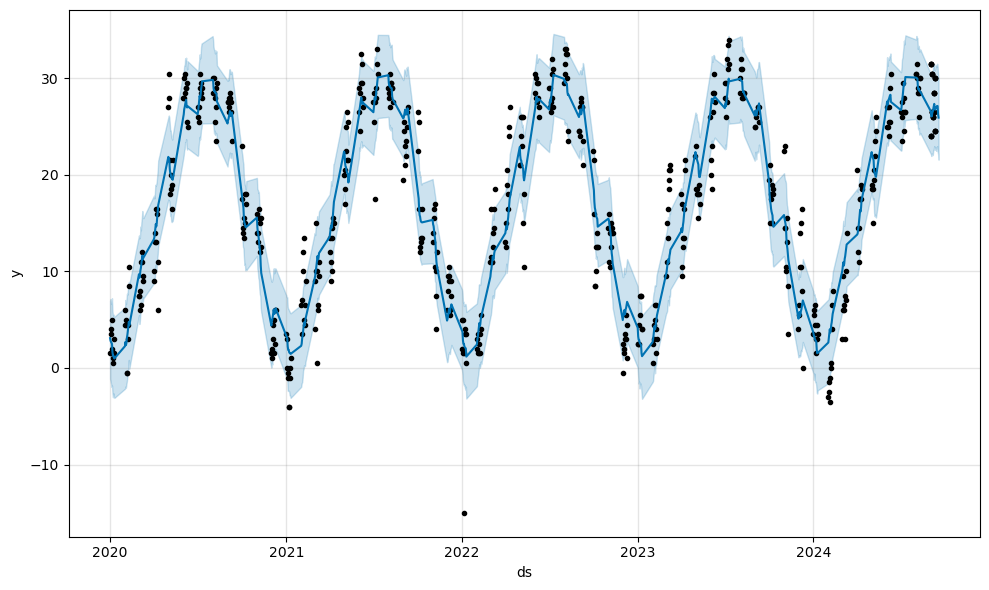

In [22]:
fig1 = m.plot(forecast)

D:\Miniconda3\envs\prophetenv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Miniconda3\envs\prophetenv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
D:\Miniconda3\envs\prophetenv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

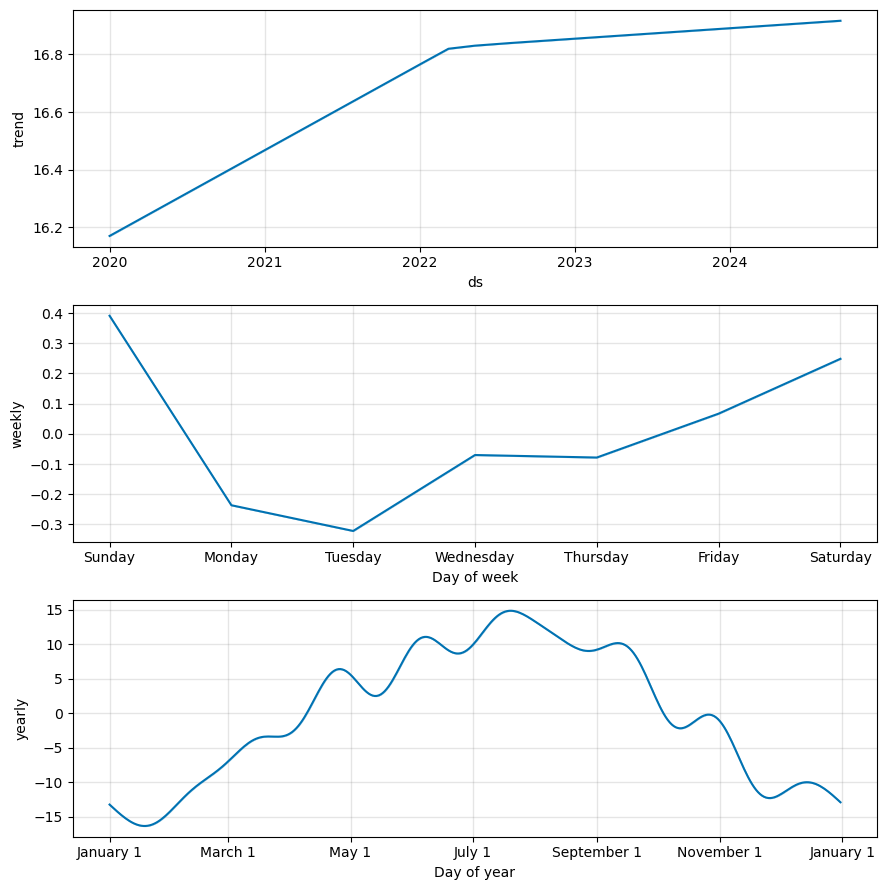

In [23]:
fig2 = m.plot_components(forecast)